<a href="https://colab.research.google.com/github/fralfaro/MAT281_2023/blob/main/docs/labs/lab_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorio N°08



<a id='p1'></a>
## I.- Problema 01


<img src="https://drive.google.com/uc?export=view&id=1ZAicRye9Ixj7jijCwNhU8Fhf6Rmjp2Z7" width = "200" align="center"/>

El conjunto de datos se denomina `vehiculos_procesado_con_grupos.csv`, el cual contine algunas de las características más importante de un vehículo.

En este ejercicio se tiene como objetivo, es poder clasificar los distintos vehículos basados en las cracterísticas que se presentan a continuación. La dificultad de este ejercicio radíca en que ahora tenemos variables numéricas y variables categóricas.

Lo primero será cargar el conjunto de datos:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.dummy import DummyClassifier
from sklearn.cluster import KMeans


%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
# cargar datos
df = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT281_2022/main/labs/lab_08/data/vehiculos_procesado_con_grupos.csv", sep=",")\
       .drop(
            ["fabricante",
             "modelo",
             "transmision",
             "traccion",
             "clase",
             "combustible",
             "consumo"],

          axis=1)

df.head()

,year,desplazamiento,cilindros,co2,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo,tamano_motor_tipo,consumo_tipo,co2_tipo,consumo_litros_milla
0,1984,2.5,4.0,522.764706,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.222671
1,1984,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
2,1985,2.5,4.0,555.437500,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.236588
3,1985,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
4,1987,3.8,6.0,555.437500,Coches Medianos,dos,Automatica,Premium,grande,alto,alto,0.236588


En este caso, no solo se tienen datos numéricos, sino que también categóricos. Además, tenemos problemas de datos **vacíos (Nan)**. Así que para resolver este problema, seguiremos varios pasos:

### 1.- Normalizar datos

1. Cree un conjunto de datos con las variables numéricas, además, para cada dato vacía, rellene con el promedio asociado a esa columna. Finalmente, normalize los datos mediante el procesamiento **MinMaxScaler** de **sklearn**.

2.  Cree un conjunto de datos con las variables categóricas , además, transforme de variables categoricas a numericas ocupando el comando **get_dummies** de pandas ([referencia](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)). Explique a grande rasgo como se realiza la codificación de variables numéricas a categóricas.

3. Junte ambos dataset en uno, llamado **df_procesado**.

In [3]:
# Tipos de dato:
df.dtypes

year                      int64
desplazamiento          float64
cilindros               float64
co2                     float64
clase_tipo               object
traccion_tipo            object
transmision_tipo         object
combustible_tipo         object
tamano_motor_tipo        object
consumo_tipo             object
co2_tipo                 object
consumo_litros_milla    float64
dtype: object

In [4]:
# Datos nulos:
df.isna().sum()

year                    0
desplazamiento          2
cilindros               3
co2                     0
clase_tipo              0
traccion_tipo           0
transmision_tipo        0
combustible_tipo        0
tamano_motor_tipo       2
consumo_tipo            0
co2_tipo                0
consumo_litros_milla    0
dtype: int64

**Comentario:** Hay datos nulos tanto en variables numéricas ('desplazamiento', 'cilindros') como en variables categóricas ('tamano_motor_tipo').  

# Parte 1: Variables Numéricas

In [5]:
# Dataframe con variables numéricas:
df_num = df.select_dtypes(include=['int64', 'float64'])
df_num.head()

,year,desplazamiento,cilindros,co2,consumo_litros_milla
0,1984,2.5,4.0,522.764706,0.222671
1,1984,4.2,6.0,683.615385,0.291185
2,1985,2.5,4.0,555.437500,0.236588
3,1985,4.2,6.0,683.615385,0.291185
4,1987,3.8,6.0,555.437500,0.236588


In [6]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler

# Rellenar datos nulos con el promedio:
df_num = df_num.fillna(df_num.mean())

# Instanciar scaler:
scaler = MinMaxScaler()

# Ajustar y aplicar scaler:
df_num_procesado = pd.DataFrame(scaler.fit_transform(df_num), columns = df_num.columns)
df_num_procesado.head()

,year,desplazamiento,cilindros,co2,consumo_litros_milla
0,0.000000,0.243590,0.142857,0.398014,0.331027
1,0.000000,0.461538,0.285714,0.527672,0.475113
2,0.029412,0.243590,0.142857,0.424351,0.360294
3,0.029412,0.461538,0.285714,0.527672,0.475113
4,0.088235,0.410256,0.285714,0.424351,0.360294


In [7]:
# Datos nulos
print(f'Cantidad de datos nulos:\n\n{df_num_procesado.isna().sum()}')

Cantidad de datos nulos:

year                    0
desplazamiento          0
cilindros               0
co2                     0
consumo_litros_milla    0
dtype: int64


# Parte 2: Variables Categóricas


In [8]:
# Dataframe con variables categóricas:
df_categ = df.select_dtypes(include=['object'])
df_categ.head()

,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo,tamano_motor_tipo,consumo_tipo,co2_tipo
0,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto
1,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto
2,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto
3,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto
4,Coches Medianos,dos,Automatica,Premium,grande,alto,alto


In [9]:
# Rellenar datos nulos con la moda:
df_categ = df_categ.fillna(df_num.mode())

# Codificar variables categóricas como numéricas:
df_categ_procesado = pd.get_dummies(df_categ)

df_categ_procesado.head()

,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,clase_tipo_Deportivos,clase_tipo_Furgoneta,clase_tipo_Vehículos Especiales,traccion_tipo_cuatro,traccion_tipo_dos,...,consumo_tipo_alto,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
0,0,0,0,0,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0


In [10]:
# Datos nulos
print(f'Cantidad de datos nulos:\n\n{df_categ_procesado.isna().sum()}')

Cantidad de datos nulos:

clase_tipo_Camionetas                          0
clase_tipo_Coche Familiar                      0
clase_tipo_Coches Grandes                      0
clase_tipo_Coches Medianos                     0
clase_tipo_Coches pequeños                     0
clase_tipo_Deportivos                          0
clase_tipo_Furgoneta                           0
clase_tipo_Vehículos Especiales                0
traccion_tipo_cuatro                           0
traccion_tipo_dos                              0
transmision_tipo_Automatica                    0
transmision_tipo_Manual                        0
combustible_tipo_Hibrido                       0
combustible_tipo_Normal                        0
combustible_tipo_Otros tipos de combustible    0
combustible_tipo_Premium                       0
tamano_motor_tipo_grande                       0
tamano_motor_tipo_mediano                      0
tamano_motor_tipo_muy grande                   0
tamano_motor_tipo_muy pequeño              

# Parte 3: Concatenar variables numéricas y categóricas procesadas

In [11]:
df_procesado = pd.concat([df_num_procesado, df_categ_procesado], axis = 1)

df_procesado.head()

,year,desplazamiento,cilindros,co2,consumo_litros_milla,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,...,consumo_tipo_alto,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
0,0.000000,0.243590,0.142857,0.398014,0.331027,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,0.000000,0.461538,0.285714,0.527672,0.475113,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0.029412,0.243590,0.142857,0.424351,0.360294,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,0.029412,0.461538,0.285714,0.527672,0.475113,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0.088235,0.410256,0.285714,0.424351,0.360294,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0


### 2.- Realizar ajuste mediante kmeans

Una vez depurado el conjunto de datos, es momento de aplicar el algoritmo de **kmeans**.

1. Ajuste el modelo de **kmeans** sobre el conjunto de datos, con un total de **8 clusters**.
2. Asociar a cada individuo el correspondiente cluster y calcular valor de los centroides de cada cluster.
3. Realizar un resumen de las principales cualidades de cada cluster. Para  esto debe calcular (para cluster) las siguientes medidas de resumen:
    * Valor promedio de las variables numérica
    * Moda para las variables numericas

In [12]:
# Ajustar modelo k-means

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=8,     # Número 'K' de clusters
                n_init=10,        # Número de inicializaciones
                random_state=42
                )
kmeans.fit(df_procesado)

KMeans(n_init=10, random_state=42)

In [13]:
# Asociar cada dato con su respectivo cluster:
clusters = kmeans.predict(df_procesado)

# Calcular centroides de cada cluster:
centroides = kmeans.cluster_centers_

In [14]:
# Dataframe para calcular características de cada cluster:
cluster_summary = pd.DataFrame()

# Promedio de las variables numéricas:
cluster_summary['promedio'] = df_procesado.groupby(clusters)[df_num.columns].mean().mean(axis=1)

# Moda variables numéricas:
for col in df_num.columns:
  cluster_summary[f'moda_{col}'] = df_procesado.groupby(clusters)[col].apply(lambda x: x.mode().iloc[0])

cluster_summary

,promedio,moda_year,moda_desplazamiento,moda_cilindros,moda_co2,moda_consumo_litros_milla
0,0.401643,0.029412,0.474359,0.285714,0.424351,0.331027
1,0.327297,0.000000,0.307692,0.285714,0.374603,0.305011
2,0.227591,0.029412,0.179487,0.142857,0.275108,0.194444
3,0.473041,0.558824,0.653846,0.428571,0.454199,0.393464
4,0.284565,0.970588,0.179487,0.142857,0.275108,0.194444
5,0.300318,0.823529,0.179487,0.142857,0.317749,0.241830
6,0.473083,0.000000,0.564103,0.428571,0.454199,0.393464
7,0.377187,0.617647,0.307692,0.285714,0.374603,0.281734


### 3.- Elegir Número de cluster

Estime mediante la **regla del codo**, el número de cluster apropiados para el caso.
Para efectos prácticos, eliga la siguiente secuencia como número de clusters a comparar:

$$[5, 10, 20, 30, 50, 75, 100, 200, 300]$$

Una vez realizado el gráfico, saque sus propias conclusiones del caso.

Al observar el gráfico resultante, se pueden obtener conclusiones sobre el número apropiado de clusters. La regla del codo sugiere elegir el número de clusters donde la reducción en la inercia se estabiliza significativamente. En otras palabras, se busca el punto en el gráfico donde la curva de inercia comienza a aplanarse o forma un codo.

In [15]:
# Secuencia del número de clusters a comparar:
num_clusters = [5,10,20,30,50,75,100,200,300]

# Listas para almacenar las inercias:
inercia = []

for k in num_clusters:
  kmeans = KMeans(n_clusters=k,
                 n_init=10,
                 random_state=42
                 )
  kmeans.fit(df_procesado)
  inercia.append(kmeans.inertia_)

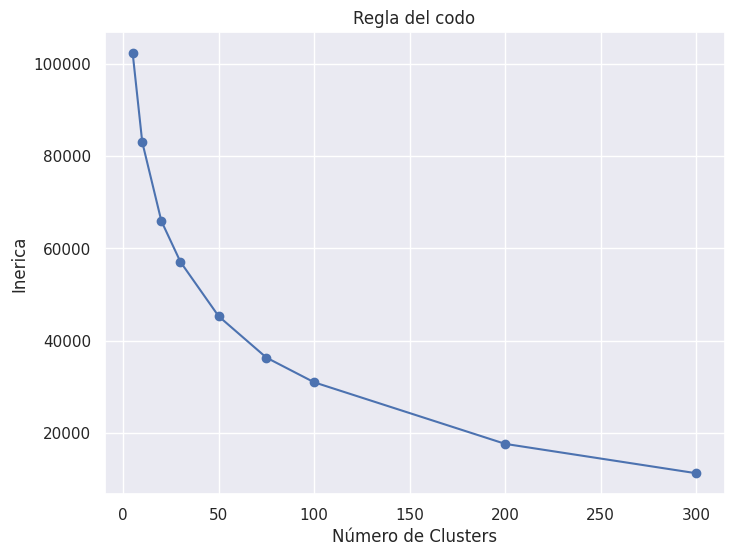

In [16]:
# Grafico de la Regla del Codo:
fig = plt.figure(figsize=(8, 6))
plt.plot(num_clusters, inercia, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inerica')
plt.title('Regla del codo')
plt.show()

In [17]:
new_num_clusters = [350, 400, 500, 600]

for k in new_num_clusters:
  kmeans = KMeans(n_clusters=k,
                 n_init=10,
                 random_state=42
                 )
  kmeans.fit(df_procesado)
  inercia.append(kmeans.inertia_)

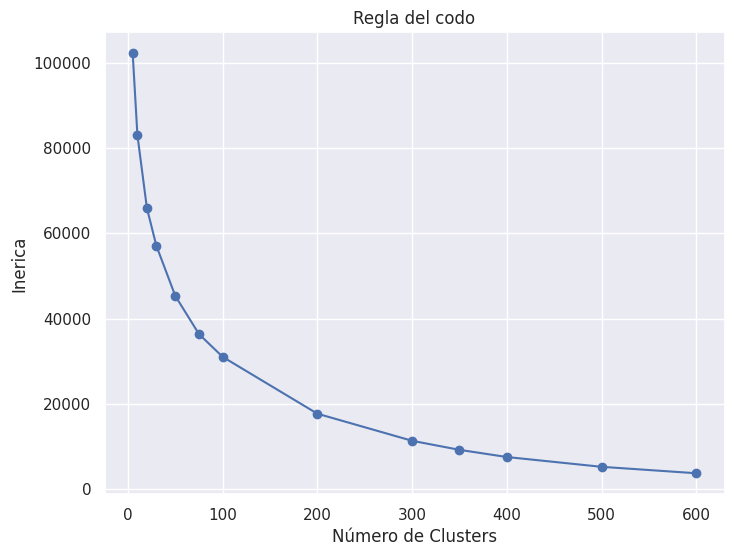

In [18]:
num_clusters = num_clusters + new_num_clusters

# Grafico de la Regla del Codo:
fig = plt.figure(figsize=(8, 6))
plt.plot(num_clusters, inercia, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inerica')
plt.title('Regla del codo')
plt.show()

**Comentario:**
Se decidió agregar unas cuantas mediciones, ya que hasta 300 no se lograba determinar bien si en ese punto se estabilizaba la reducción de la inercia. Con estos nuevos puntos se puede determinar con seguridad que el codo si corresponde al número de clusters = 300.

## II.- Problema 02

<img src="https://live.staticflickr.com/7866/47075467621_85ab810139_c.jpg" align="center"/>

Para el conjunto de datos de **Iris**, se pide realizar una reducción de dimensionalidad ocupando las técnicas de PCA y TSNE (vistas en clases).



In [19]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [20]:
dataset = load_iris()

features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
target = 'species'
iris = pd.DataFrame(
    dataset.data,
    columns=features)

iris['species'] = dataset.target
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


El objetivo es aplicar ambos algoritmos de la siguiente manera:

* Análisis detallado algoritma PCA (tablas, gráficos, etc.)
* Análisis detallado algoritma TSNE (tablas, gráficos, etc.)
* Comparar ambos algoritmos (conclusiones del caso)

In [21]:
# PCA:
pca = PCA(n_components=2) # Para poder graficar
resultados_pca = pca.fit_transform(iris[features])
iris_pca = pd.DataFrame(data = resultados_pca,
                        columns = ['pca1', 'pca2'])
iris_pca['species'] = iris[target]

iris_pca.head()

,pca1,pca2,species
0,-2.684126,0.319397,0
1,-2.714142,-0.177001,0
2,-2.888991,-0.144949,0
3,-2.745343,-0.318299,0
4,-2.728717,0.326755,0


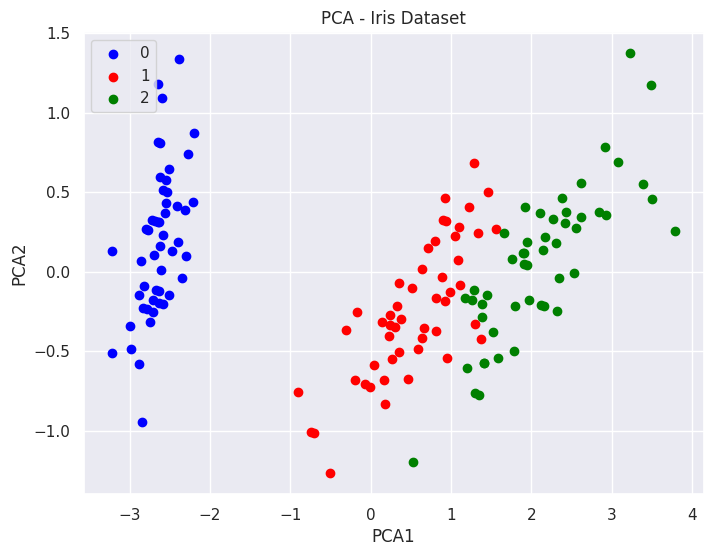

In [22]:
# Gráfico PCA:
plt.figure(figsize=(8,6))
species = [0, 1, 2]
colores = ['blue', 'red', 'green']
for specie, color in zip(species, colores):
  datos_especie = iris_pca['species'] == specie
  plt.scatter(x = iris_pca.loc[datos_especie, 'pca1'],
              y = iris_pca.loc[datos_especie, 'pca2'],
              c = color,
              label = specie)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('PCA - Iris Dataset')
plt.legend()
plt.show()

In [23]:
# t-SNE
tsne = TSNE(n_components=2, # Para poder graficar y comparar con PCA
            random_state=42)
resultados_tsne = tsne.fit_transform(iris[features])
iris_tsne = pd.DataFrame(data = resultados_tsne,
                         columns = ['tsne1', 'tsne2'])
iris_tsne['species'] = iris[target]

iris_tsne.head()

,tsne1,tsne2,species
0,-23.580931,-0.522060,0
1,-26.291704,-1.093696,0
2,-26.193335,0.053057,0
3,-26.638256,-0.321696,0
4,-23.545013,-0.941377,0


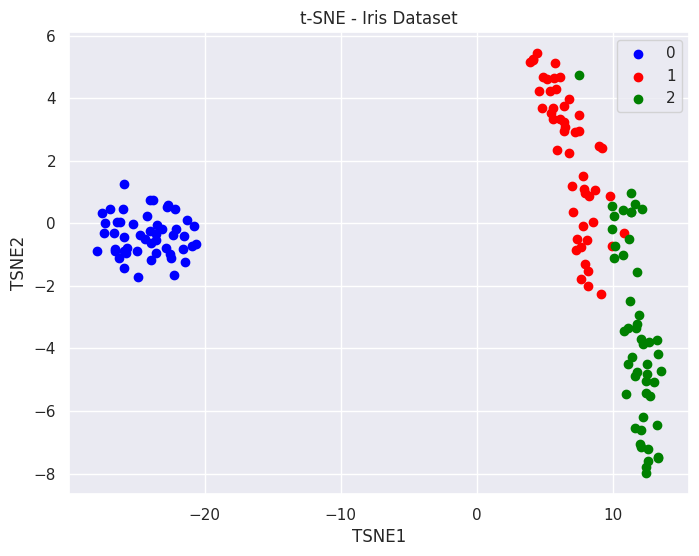

In [24]:
# Gráfico t-SNE:
plt.figure(figsize=(8,6))
species = [0, 1, 2]
colores = ['blue', 'red', 'green']
for specie, color in zip(species, colores):
  datos_especie = iris_tsne['species'] == specie
  plt.scatter(x = iris_tsne.loc[datos_especie, 'tsne1'],
              y = iris_tsne.loc[datos_especie, 'tsne2'],
              c = color,
              label = specie)
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.title('t-SNE - Iris Dataset')
plt.legend()
plt.show()

**Comentario:**

Se observa que, en dimensión 2, tanto t-SNE como PCA logran agrupar las distintas especies, por lo que no se ve necesario aumentar la dimensionalidad.

Ambas técnicas separan de forma clara la especie 0. Las especies 1 y 2, si bien se diferencian en grupo una de otra, poseen ciertos puntos donde se mezclan. Esto último ocurre más en PCA que en t-SNE. Por lo tanto, para este caso, es mejor t-SNE.